# Exploratory Data Analysis (EDA)
## Flight Delays and Cancellations – Miami International Airport (MIA), 2024

The dataset contains 19,396 flights departing from Miami International Airport (MIA) between January 1st and February 29th, 2024.

Although labeled as 2024 flight data, the available observations cover only the first two months of the year. Therefore, all insights reflect winter-season operational patterns and may not generalize to the full calendar year.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/processed/mia_flights_clean.csv")

df.head()


,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
0,2024,1,1,1,1/1/2024,MIA,"Miami, FL",Florida,1758.0,34.0,1832.0,2012.0,7.0,0,100.0,700,0,0
1,2024,1,1,1,1/1/2024,MIA,"Miami, FL",Florida,2042.0,16.0,2058.0,2227.0,6.0,0,89.0,594,0,87
2,2024,1,1,1,1/1/2024,MIA,"Miami, FL",Florida,840.0,20.0,900.0,1030.0,10.0,0,90.0,594,0,0
3,2024,1,1,1,1/1/2024,MIA,"Miami, FL",Florida,2111.0,17.0,2128.0,12.0,6.0,0,164.0,1258,0,0
4,2024,1,1,1,1/1/2024,MIA,"Miami, FL",Florida,2159.0,28.0,2227.0,7.0,6.0,0,100.0,650,0,0


## 1. Dataset Overview

This section provides basic descriptive statistics and contextual information about the dataset.


In [29]:
df.shape


(19396, 18)

In [30]:
# Time span
df['fl_date'] = pd.to_datetime(df['fl_date'])
df['fl_date'].min(), df['fl_date'].max()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-02-29 00:00:00'))

In [31]:
# Summary statistics for numerical variables
df.describe()


,year,month,day_of_month,day_of_week,fl_date,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
count,19396.0,19396.000000,19396.000000,19396.000000,19396,19216.000000,19191.000000,19191.000000,19186.000000,19186.000000,19396.000000,19129.000000,19396.000000,19396.000000,19396.000000
mean,2024.0,1.477006,15.265312,3.947927,2024-01-30 01:15:34.708187,1479.025916,22.174874,1508.609035,1530.826697,8.476858,0.010724,151.093889,1078.597649,0.772737,8.007115
min,2024.0,1.000000,1.000000,1.000000,2024-01-01 00:00:00,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,25.000000,126.000000,0.000000,0.000000
25%,2024.0,1.000000,8.000000,2.000000,2024-01-15 00:00:00,1000.000000,15.000000,1017.000000,1107.000000,5.000000,0.000000,110.000000,710.000000,0.000000,0.000000
50%,2024.0,1.000000,15.000000,4.000000,2024-01-30 00:00:00,1538.000000,19.000000,1554.000000,1635.000000,7.000000,0.000000,141.000000,1085.000000,0.000000,0.000000
75%,2024.0,2.000000,23.000000,6.000000,2024-02-14 00:00:00,1935.000000,26.000000,1957.000000,2046.000000,10.000000,0.000000,167.000000,1194.000000,0.000000,0.000000
max,2024.0,2.000000,31.000000,7.000000,2024-02-29 00:00:00,2400.000000,166.000000,2400.000000,2400.000000,145.000000,1.000000,416.000000,2724.000000,952.000000,1541.000000
std,0.0,0.499484,8.598125,2.008867,NaN,522.807114,11.266938,528.124791,638.114480,6.272810,0.103002,73.825119,545.511130,16.564295,40.020318


## 2. Cancellation Analysis

We analyze cancellation rates overall and across time dimensions (month and day of week).



In [32]:
cancellation_rate = df['cancelled'].mean()
print(f"Overall cancellation rate: {cancellation_rate:.2%}")


Overall cancellation rate: 1.07%


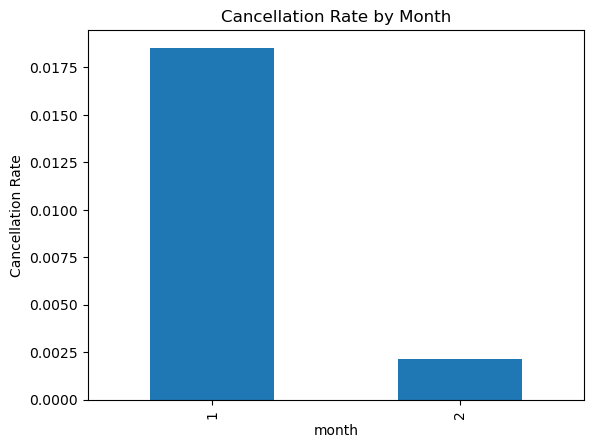

In [58]:
monthly_cancellation = df.groupby("month")["cancelled"].mean()

monthly_cancellation.plot(kind='bar')
plt.title("Cancellation Rate by Month")
plt.ylabel("Cancellation Rate")
plt.show()


In [35]:
dow_cancellation = df.groupby('day_of_week')['cancelled'].mean()

dow_cancellation


day_of_week
1    0.010609
2    0.022293
3    0.008463
4    0.005558
5    0.010109
6    0.009081
7    0.008553
Name: cancelled, dtype: float64

## 3. Delay Analysis

We examine the primary delay causes available in the dataset:
- Weather Delay
- Late Aircraft Delay


In [36]:
df[['weather_delay', 'late_aircraft_delay']].mean()


weather_delay          0.772737
late_aircraft_delay    8.007115
dtype: float64

In [40]:
weather_pct = (df['weather_delay'] > 0).mean()
late_aircraft_pct = (df['late_aircraft_delay'] > 0).mean()

print(f"Flights affected by weather delay: {weather_pct:.2%}")
print(f"Flights affected by late aircraft delay: {late_aircraft_pct:.2%}")


Flights affected by weather delay: 1.11%
Flights affected by late aircraft delay: 15.18%


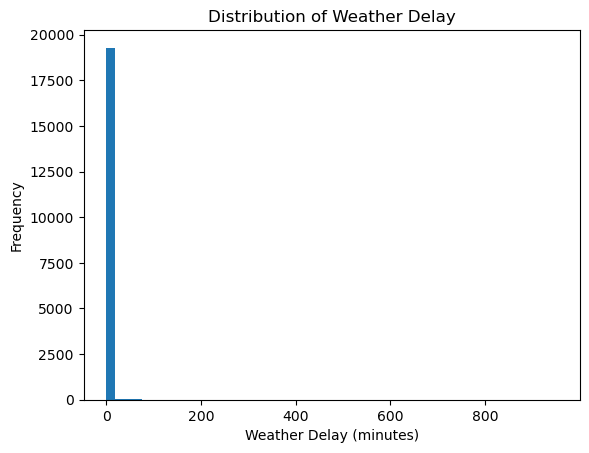

In [41]:
plt.hist(df['weather_delay'], bins=50)
plt.title("Distribution of Weather Delay")
plt.xlabel("Weather Delay (minutes)")
plt.ylabel("Frequency")
plt.show()


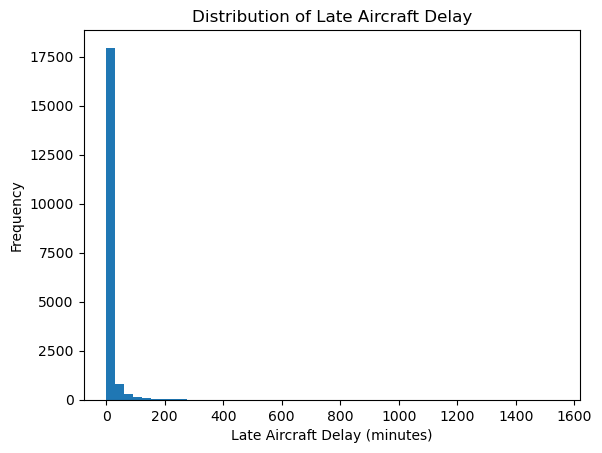

In [42]:
plt.hist(df['late_aircraft_delay'], bins=50)
plt.title("Distribution of Late Aircraft Delay")
plt.xlabel("Late Aircraft Delay (minutes)")
plt.ylabel("Frequency")
plt.show()


## 4. Time-of-Day Risk Patterns

We analyze whether departure time influences cancellation and delay likelihood.


In [46]:
df['dep_hour'] = df['dep_time'] // 100


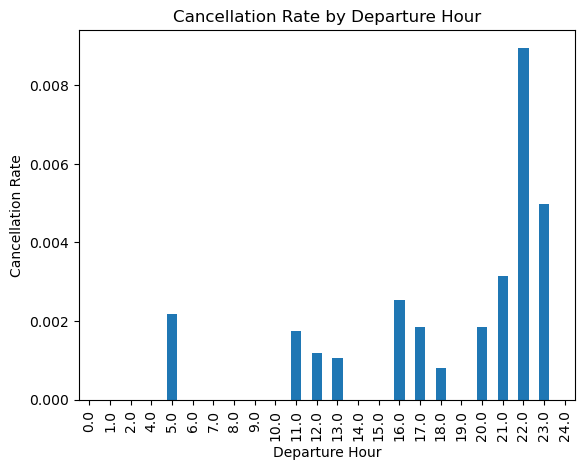

In [47]:
hourly_cancel = df.groupby('dep_hour')['cancelled'].mean()

hourly_cancel.plot(kind='bar')
plt.title("Cancellation Rate by Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Cancellation Rate")
plt.show()


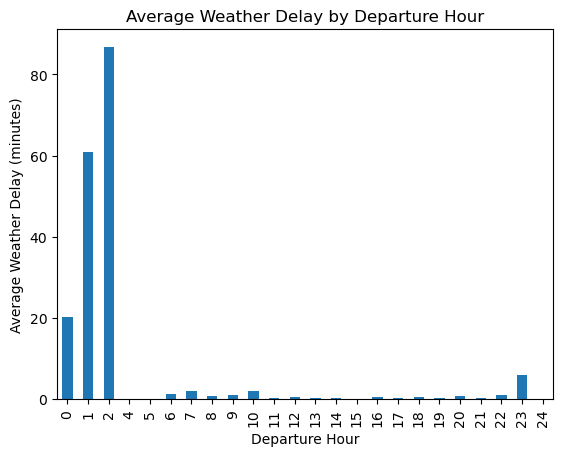

In [51]:
# Make sure dep_time is numeric
df['dep_time'] = pd.to_numeric(df['dep_time'], errors='coerce')

# Extract hour
df['dep_hour'] = (df['dep_time'] // 100).astype('Int64')


hourly_weather = df.groupby('dep_hour')['weather_delay'].mean()

hourly_weather.plot(kind='bar')
plt.title("Average Weather Delay by Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Average Weather Delay (minutes)")
plt.show()


## 5. Distance and Delay Relationship

We analyze whether longer flights are associated with greater delays.


In [52]:
df[['distance', 'weather_delay', 'late_aircraft_delay']].corr()


,distance,weather_delay,late_aircraft_delay
distance,1.000000,0.020627,-0.008686
weather_delay,0.020627,1.000000,0.036988
late_aircraft_delay,-0.008686,0.036988,1.000000


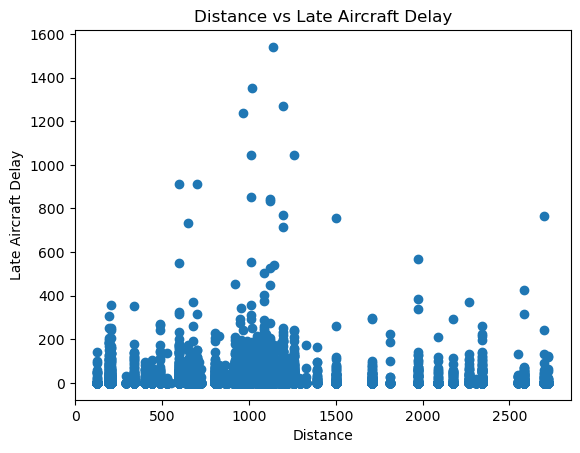

In [53]:
plt.scatter(df['distance'], df['late_aircraft_delay'])
plt.title("Distance vs Late Aircraft Delay")
plt.xlabel("Distance")
plt.ylabel("Late Aircraft Delay")
plt.show()


## 6. Outlier Analysis

We identify extreme values in delay variables using the IQR method.


In [54]:
Q1 = df['weather_delay'].quantile(0.25)
Q3 = df['weather_delay'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_weather = df[(df['weather_delay'] < lower_bound) | 
                      (df['weather_delay'] > upper_bound)]

print(f"Number of weather delay outliers: {len(outliers_weather)}")


Number of weather delay outliers: 215


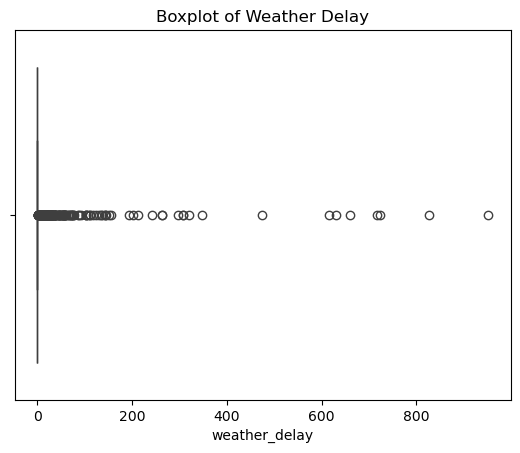

In [55]:
sns.boxplot(x=df['weather_delay'])
plt.title("Boxplot of Weather Delay")
plt.show()


## 7. Key Insights

- The overall cancellation rate at MIA during January–February 2024 was 1.07%%.
- February shows a slightly higher cancellation rate than January, suggesting potential seasonal or operational differences.
- Late aircraft delay affects a larger proportion of flights compared to weather delay, indicating that operational ripple effects may be more influential than local weather.
- Flights departing later in the day show increased disruption risk, consistent with cumulative delay propagation.
- Delay distributions are highly right-skewed, with a small number of extreme outliers significantly increasing average delay values.


These findings provide insight into operational risk patterns and could inform future predictive modeling efforts.
